In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing import image

In [3]:
train = "training_set"
test = "test_set"

In [4]:
train_datagen = ImageDataGenerator(
                width_shift_range=0.1,
                height_shift_range=0.1,
                horizontal_flip=True,
                rescale=1./255,
                validation_split=0.2
                )
test_datagen = ImageDataGenerator(
                rescale=1./255,
                validation_split=0.2
                )

In [7]:
train_generator = train_datagen.flow_from_directory(
    directory=train,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
    )
test_generator = test_datagen.flow_from_directory(
    directory=test,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation")

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


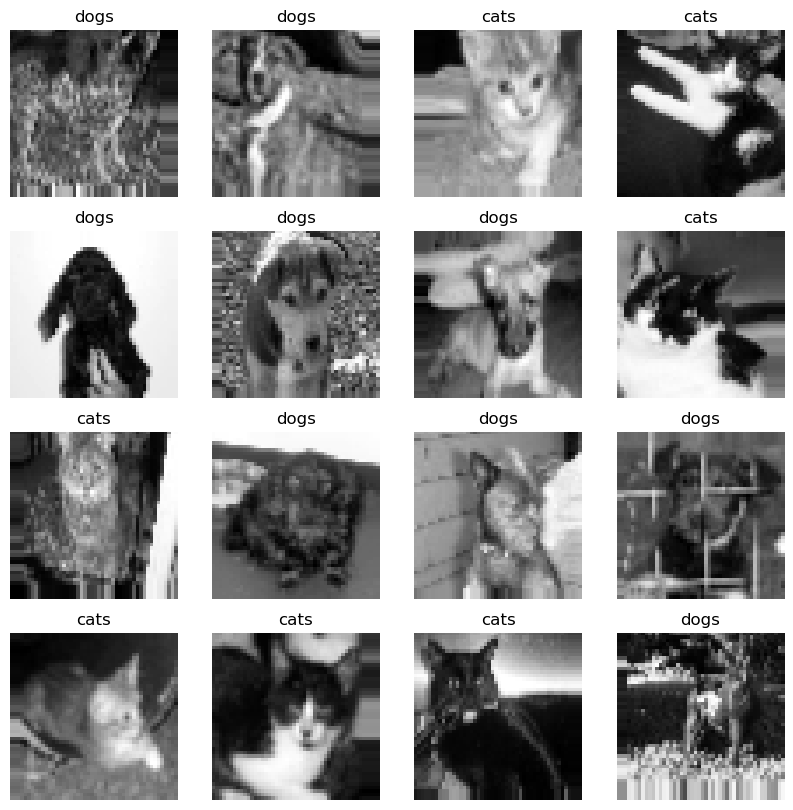

In [8]:
import matplotlib.pyplot as plt

batch = next(train_generator)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i], cmap="gray")
    label_idx = batch[1][i].argmax() 
    label_map = {v:k for k,v in train_generator.class_indices.items()} 
    ax.set_title(label_map[label_idx])
    ax.axis('off') 
    
plt.show()

In [31]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 44, 44, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 44, 44, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         991,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,001,250 (3.82 MB)

 Trainable params: 1,001,122 (3.82 MB)

 Non-trainable params: 128 (512.00 B)

In [32]:
checkpoint_callback = ModelCheckpoint(
    filepath="model.weights.h5",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    mode="max",
    verbose=1
)

history = model.fit(
    train_generator,
    batch_size=64,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.4650 - loss: 1.4516
Epoch 1: val_accuracy improved from -inf to 0.57500, saving model to model.weights.h5
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 307ms/step - accuracy: 0.4666 - loss: 1.4398 - val_accuracy: 0.5750 - val_loss: 0.6966
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.5735 - loss: 0.8134
Epoch 2: val_accuracy did not improve from 0.57500
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 269ms/step - accuracy: 0.5734 - loss: 0.8134 - val_accuracy: 0.5000 - val_loss: 0.7950
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6539 - loss: 0.6563
Epoch 3: val_accuracy did not improve from 0.57500
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.6531 - loss: 0.6572 - val_accuracy: 0.5000 - val_loss: 1.1259
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.6221 - loss: 0.6596
Epoch 4: val_accuracy did not improve from 0.57500
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.6226 - los

In [33]:
validation_loss, validation_acc = model.evaluate(test_generator)
print("Validation loss:", validation_loss, "\t Validation accuracy:", validation_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.4943 - loss: 3.6289
Validation loss: 3.712543487548828 	 Validation accuracy: 0.5


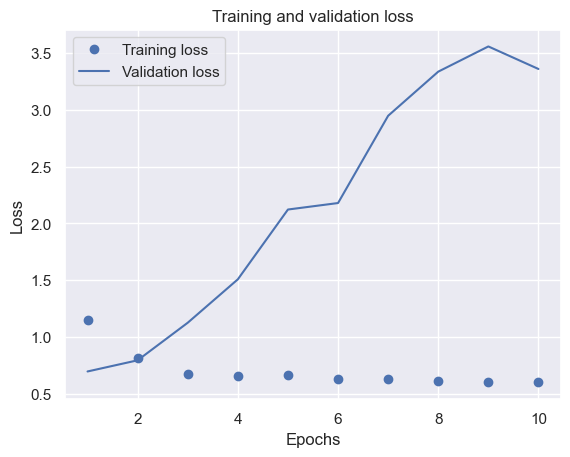

In [34]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

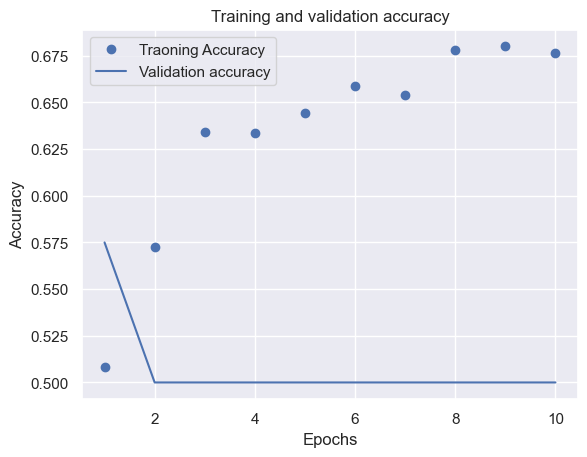

In [41]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, train_acc, "bo", label="Traoning Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000019E621B04A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step


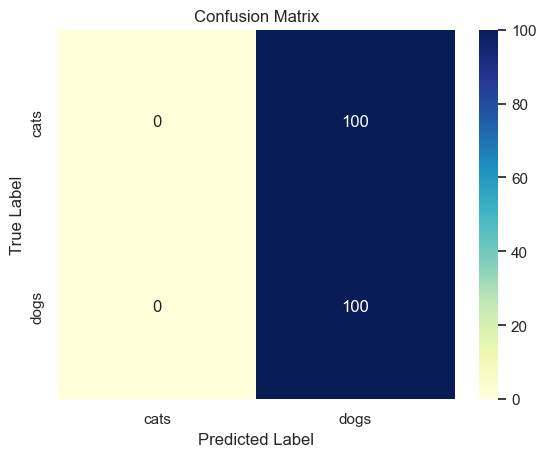

In [36]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = test_generator.classes
validation_pred_probs = model.predict(test_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [37]:
img_path = r"P:\Data Science\PGA\Deep Learning\CV Home Assign\Home Assign\Take Home Assignment on CNN\Dataset\Dataset\test_set\cats\cat.2097.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode="grayscale")  
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0) 
img_array /= 255.  

prediction = model.predict(img_array) 

label_map = {v:k for k,v in train_generator.class_indices.items()}  
predicted_label = label_map[np.argmax(prediction)] 
print(" Emotion predicted of this image is", predicted_label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
 Emotion predicted of this image is dogs


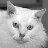

In [38]:
img